In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import numpy.linalg as la

$$
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
$$

# Nonlinear Dimension Reduction

In [3]:
np.random.seed(123)
np.set_printoptions(3)

## Limitations of PCA

We will project a 2-d data set onto 1-d to see one limitation of PCA. This provides motivation for learning non-linear methods of dimension reduction.

In [4]:
x1 = np.random.multivariate_normal([-3,3], np.eye(2), 100)
x2 = np.random.multivariate_normal([3,3], np.eye(2), 100)
x3 = np.random.multivariate_normal([0,-10], np.eye(2), 100)
xs = np.r_[x1, x2, x3]
xs = (xs - xs.mean(0))/xs.std()
zs = np.r_[np.zeros(100), np.ones(100), 2*np.ones(100)]

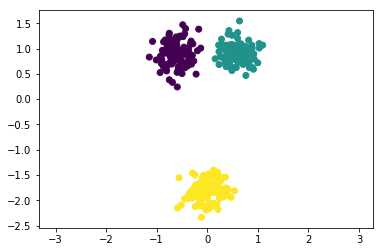

In [5]:
plt.scatter(xs[:, 0], xs[:, 1], c=zs)
plt.axis('equal')
pass

### PCA does not preserve locality

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=1)
ys = pca.fit_transform(xs)

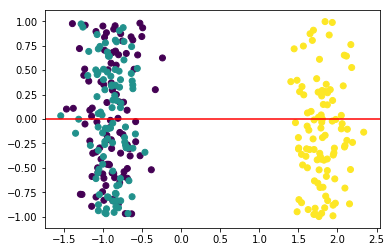

In [8]:
plt.scatter(ys[:, 0], np.random.uniform(-1, 1, len(ys)), c=zs)
plt.axhline(0, c='red')
pass

### t-SNE preserves locality

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(n_components=1)
ts = tsne.fit_transform(xs)

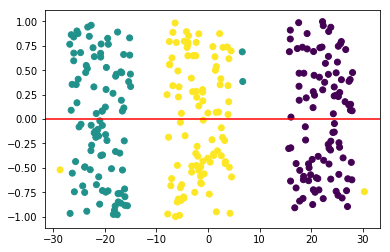

In [11]:
plt.scatter(ts[:, 0], np.random.uniform(-1, 1, len(ts)), c=zs)
plt.axhline(0, c='red')
pass

## Multi-dimensional scaling (MDS)

MDS starts wtih a dissimilarity matrix. When the dissimilarties have a metric, this is equivalent to a distrance matrix. Recall that a metric or distance function has the following properites

$$
d(x, y) \ge 0 \\
d(x, y) = 0 \iff x = y \\
d(x, y) = d(y, x) \\
d(x, z) \le d(x, y) + d(y, z)
$$

### Inutitive explanaion of MDS

MDS tries to map points $y_i$ in space $\mathbb{R}^n$ to matching points $x_i$ in a map space $\mathbb{R}^k$ such that the sum of difference of pairwise distances is minimized. Note that we do not need the orignal coordinates of the points $\mathbb{R}^n$ - all we need is the distance matrix $D$. Conceptually MDS tries to minimize a quantity similar to

$$
\norm{D_{i,j} - \norm{x_i - x_j}}^2
$$

Since translation does not affect the difference, a furhter constraint is that $\sum x_i = 0$.

![PCA and MDS](https://i.stack.imgur.com/WvnU7.png)

Consider the followoing distanaces between 3 points $A, B, C$

$$
d(A, B) = 1 \\
d(B, C) = 1 \\
d(A, C) = 2 \\
$$

There is a 1D map that that perfectly captures the distances between the 3 points.

and 

$$
d(A, B) = 1 \\
d(B, C = 1 \\
d(A, C) = 1
$$

There is no 1D map that that perfectly captures the distances between the 3 points, but this is easily done in 2D. This shows that it is not always possible to find a distance function in the MDS map ($\mathbb{R}^n$ ) that preserves the orignal distnaces in $\mathbb{R}^n$.



### Stress

Let $D_{ij}$ be the distance between $y_i$ and $y_j$ in the original space, and $d_{ij}$ be the distance between $x_i$ and $x_j$ in the map space. Then the cost function for MDS is 

$\text{Stress} = \left( \frac{\sum_{i < j} (D_{ij} - f(d_{ij})^2}{\sum_{i < j} d_{ij}^{2}} \right)^{\frac{1}{2}}$

for some monotonic function $f$ (usually taken as the identity for quantitative variables). This is solved by iterative numerical optimization

### Strain

There is a variant of MDS known as classical MDS that uses a different optimizaiton criterion 

$\text{Strain} = \left( \frac{\sum_{i < j} (B_{ij} - \langle x_i, x_j \rangle)^2}{\sum_{i < j} b_{ij}^{2}} \right)^{\frac{1}{2}}$

where $B = X^TX$. Finding $X$ redcues to a PCA of $B$ (we will explore in homework). 

Note that classical MDS does not give the sme solution as metric MDS. Note also that classic MDS assumes that distances are Euclidean.

### Example

In [12]:
from sklearn.manifold import MDS

In [13]:
%load_ext rpy2.ipython

In [14]:
import pandas as pd

In [15]:
data = np.loadtxt('data/simu_SAGMB.txt')

#### Subsample

In [16]:
n = 1000
idx = np.random.choice(range(len(data)), n, replace=False)
data = data[idx]

In [17]:
plt.prism()

<Figure size 432x288 with 0 Axes>

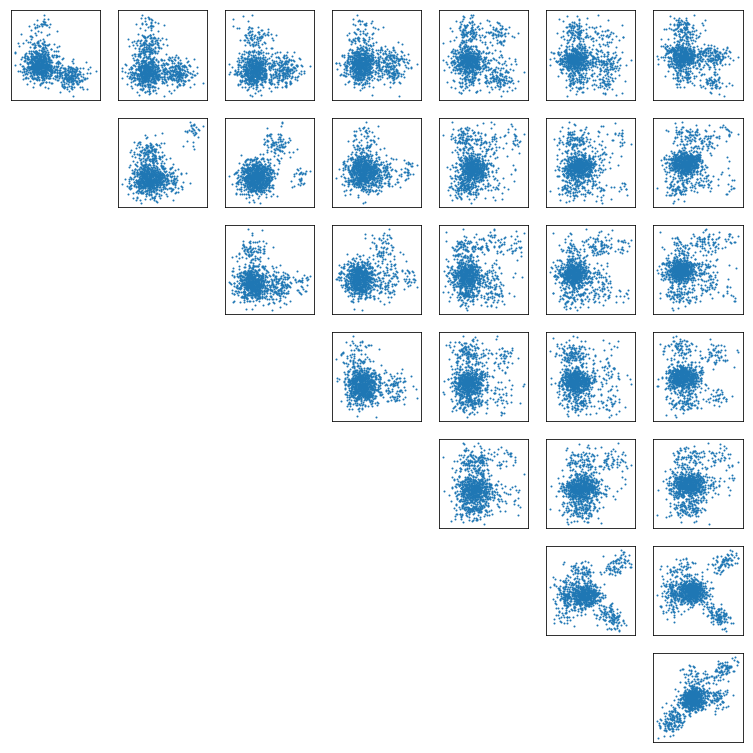

In [18]:
plt.figure(figsize=(12,12))
for i in range(8):
    for j in range(i+1, 8):
        plt.subplot(8, 8, i*8+j+1)
        x, y = data[:, i], data[:, j]
        plt.scatter(x, y, s=1)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()

#### PCA

In [19]:
pca2 = PCA(n_components=2)

In [20]:
%%time

x_pca2 = pca2.fit_transform(data)

CPU times: user 5.81 ms, sys: 6.12 ms, total: 11.9 ms
Wall time: 1.37 ms


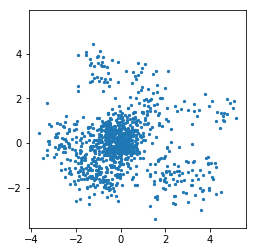

In [21]:
plt.scatter(x_pca2[:, 0], x_pca2[:, 1], s=5)
plt.axis('square')
pass

#### MDS from data

In [22]:
mds = MDS(n_components=2)

In [23]:
%%time

x_mds = mds.fit_transform(data)

CPU times: user 1min 25s, sys: 3min 26s, total: 4min 52s
Wall time: 15.4 s


In [24]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

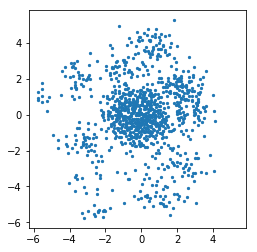

In [25]:
plt.scatter(x_mds[:, 0], x_mds[:, 1], s=5)
plt.axis('square')
pass

#### MDS from dissimilarity matrix

In [26]:
from scipy.spatial.distance import pdist, squareform

In [27]:
import numpy as np

In [28]:
d = pdist(data, metric='euclidean')

In [29]:
np.set_printoptions(precision=2)
squareform(d)

array([[0.  , 2.97, 2.55, ..., 3.12, 7.35, 3.94],
       [2.97, 0.  , 3.46, ..., 3.59, 7.12, 4.52],
       [2.55, 3.46, 0.  , ..., 0.94, 5.71, 1.79],
       ...,
       [3.12, 3.59, 0.94, ..., 0.  , 5.57, 1.75],
       [7.35, 7.12, 5.71, ..., 5.57, 0.  , 5.67],
       [3.94, 4.52, 1.79, ..., 1.75, 5.67, 0.  ]])

In [30]:
mds2 = MDS(dissimilarity='precomputed')

In [31]:
%%time

x_mds2 = mds2.fit_transform(squareform(d))

CPU times: user 1min 21s, sys: 3min 16s, total: 4min 37s
Wall time: 14.6 s


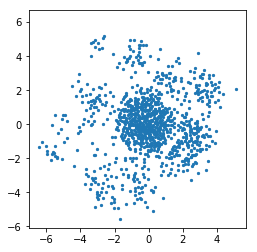

In [32]:
plt.scatter(x_mds2[:, 0], x_mds2[:, 1], s=5)
plt.axis('square')
pass

## t-distributed Stochastic Neighbor Embedding (t-SNE)

The t-SNE algoorithm was designed to preserve local distances between points in the original space, as we saw in the example above. This means that t-SNE is particularly effective at preserving **clusters** in the origianl space. The full t-SNE algorithm is quite complex, so we just sketch the ideas here.

For meore details, see the orignal [series of papers](https://lvdmaaten.github.io/tsne/) and this Python [tutorial](https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm). The algorithm is also clearly laid out in the fairly comprehensive [tutorial](https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/).

### Outline of t-SNE

t-SNE is similar in outline to MDS, with two main differences - "distances" are baased on probabilistic concepts and depend on the local neighborhood of the point.

#### Original space

- Find the conditinoal similarity between points in the original space based on a Gaussian kernel

$$
p_{j \mid i} = \frac{f(\vert y_i - y_j \vert)}{\sum_{k \ne i} {f(\vert y_i - y_k \vert)}}
$$

where

$$
f(z) = {e^\frac{{-z^2}}{2\sigma_i^2}}
$$

- Symmetize the conditional similarity (this is necessary becasue each kernel has its own variance)

$$
p_{ij} = \frac{p_{i \mid j} + p_{j \mid i}}{2}
$$

- This gives a similarity matrix $p_{ij}$ that is fixed

Notes

- In t-SNE, the variance of the Gaussian kernel depensd on the point $x_i$. Intuitively, we want the variance to be small if $x_i$ is in a locally desnse region, and to be large if $x_i$ is in a locally sparse region. This is done by an iteratvie algorithm that depends on a user-defined variable called **perplexity**. Roughly, perplexity determines the number of meaningful neighbors each point should have.

#### Map space

- Find the conditional similarity between points in the map space based on a Cauchy kernel

$$
q_{ij} = \frac{g(\vert y_i - y_j \vert)}{\sum_{k \ne i} {g(\vert y_i - y_k \vert)}}
$$

where

$$
g(z) = \frac{1}{1+z^2}
$$

- This gives a similarity matrix $q_{ij}$ that depends on the points in the map space that we can vary

#### Optimization

- Minimize the Kullback-Leibler divergence between $p_{ij}$ and $q_{ij}$

$$
\text{KL}(P \mid\mid  Q) = \sum p_{ij} \log{\frac{p_{ij}}{q_{ij}}}
$$

#### Normal and Cauhcy distributions

The Cauchy has mcuh fatter tails than the normal distribuiotn.  This means that two points that are widely separated in the original space would be pushed much further apart in the map space.

In [33]:
from scipy.stats import norm, cauchy

In [34]:
d1 = norm()
d2 = cauchy()

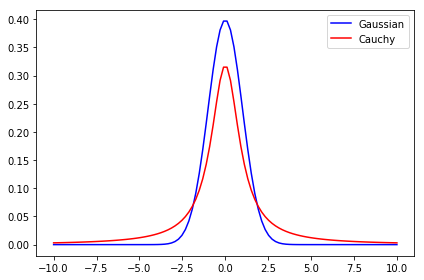

In [35]:
x = np.linspace(-10, 10, 100)
plt.plot(x, d1.pdf(x), c='blue')
plt.plot(x, d2.pdf(x), c='red')
plt.legend(['Gaussian', 'Cauchy'])
plt.tight_layout()
pass

#### Poinsts close together in in original space stay close together

In [36]:
x = np.linspace(-10, 0, 100)

In [37]:
from scipy.optimize import fsolve

In [38]:
p1 = fsolve(lambda x: d1.pdf(x) - 0.1, -2)
p2 = fsolve(lambda x: d2.pdf(x) - 0.1, -2)

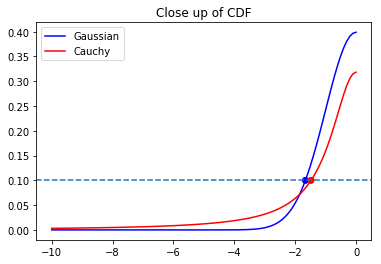

In [39]:
plt.plot(x, d1.pdf(x), c='blue')
plt.plot(x, d2.pdf(x), c='red')
plt.axhline(0.1, linestyle='dashed')
plt.legend(['Gaussian', 'Cauchy'])
plt.title('Close up of CDF')
plt.scatter([p1, p2], [0.1, 0.1], c=['blue', 'red'])
xlim = plt.xlim()
pass

#### Poinsts far apart in in original space are pushed even furhter apart

In [40]:
x = np.linspace(-10, -2, 100)

In [41]:
p1 = fsolve(lambda x: d1.pdf(x) - 0.01, -2)
p2 = fsolve(lambda x: d2.pdf(x) - 0.01, -2)

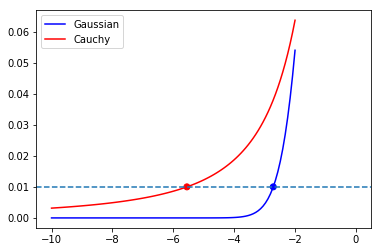

In [42]:
plt.plot(x, d1.pdf(x), c='blue')
plt.plot(x, d2.pdf(x), c='red')
plt.xlim(xlim)
plt.axhline(0.01, linestyle='dashed')
plt.scatter([p1, p2], [0.01, 0.01], c=['blue', 'red'])
plt.legend(['Gaussian', 'Cauchy'])
pass

In [43]:
np.abs([d1.ppf(0.04), d2.ppf(0.04)])

array([1.75, 7.92])

### Example

In [44]:
tsne2 = TSNE(n_components=2)

In [45]:
%%time

x_tsne2 = tsne2.fit_transform(data)

CPU times: user 11.1 s, sys: 2.03 s, total: 13.1 s
Wall time: 13.1 s


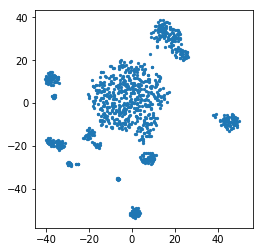

In [46]:
plt.scatter(x_tsne2[:, 0], x_tsne2[:, 1], s=5)
plt.axis('square')
pass